<a href="https://colab.research.google.com/github/Nawaf9997/reference-ML-S-/blob/main/Decision_Trees_Class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Load the Iris dataset
iris = load_iris()

# Extract petal length and width features from the dataset
X = iris.data[:, 2:]  # petal length and width

# Extract target variable (class labels)
y = iris.target

# Initialize a DecisionTreeClassifier with a maximum depth of 2 and random state for reproducibility
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)

# Train the DecisionTreeClassifier on the dataset
tree_clf.fit(X, y)


DecisionTreeClassifier(max_depth=2, random_state=42)

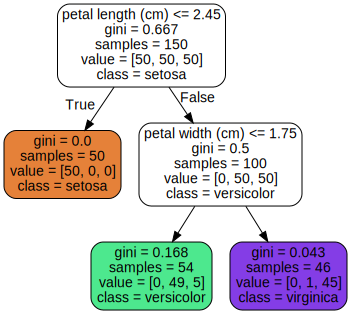

In [6]:
# Import necessary libraries
from graphviz import Source
from sklearn.tree import export_graphviz
import os
IMAGES_PATH = '/content/sample_data'

# Export the trained Decision Tree classifier as a .dot file
export_graphviz(
    tree_clf,
    out_file=os.path.join(IMAGES_PATH, "iris_tree.dot"),  # Output file path
    feature_names=iris.feature_names[2:],  # Feature names (petal length and width)
    class_names=iris.target_names,  # Class names (species)
    rounded=True,  # Rounded corners in the decision nodes
    filled=True  # Fill the decision nodes with colors representing classes
)

# Visualize the Decision Tree using Graphviz
Source.from_file(os.path.join(IMAGES_PATH, "iris_tree.dot"))


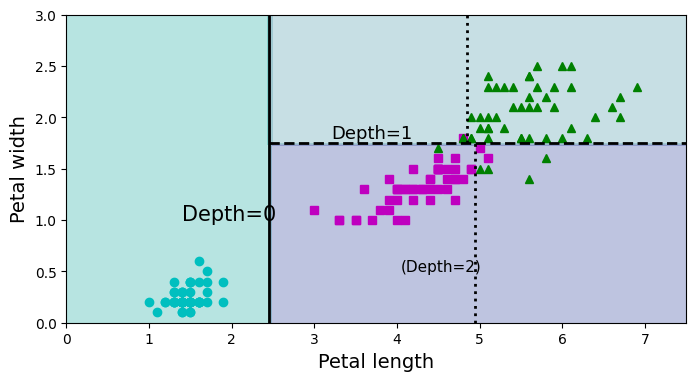

In [7]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Function to plot decision boundaries of a classifier
def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    # Generate a meshgrid of points to predict
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]

    # Predict the class labels for the meshgrid points
    y_pred = clf.predict(X_new).reshape(x1.shape)

    # Define custom colormap for decision regions
    custom_cmap = ListedColormap(["#12a79d", "#293d9b", "#4898a8"])

    # Plot filled contour plot of decision regions
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)

    # Plot contour lines separating decision regions
    if not iris:
        custom_cmap2 = ListedColormap(["#12a79d", "#293d9b", "#4898a8"])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)

    # Plot the training data points
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "co", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "ms", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)

    # Set x and y labels depending on whether it's an Iris dataset or not
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

    # Add legend if specified
    if legend:
        plt.legend(loc="lower right", fontsize=14)

# Plot the decision boundaries of the trained Decision Tree classifier
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)

# Add decision boundary lines and depth annotations
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

# Display the plot
plt.show()


In [8]:
# Use the trained Decision Tree classifier to predict the probability estimates for a new sample
tree_clf.predict_proba([[5, 1.5]])


array([[0.        , 0.90740741, 0.09259259]])

In [9]:
# Create a new DecisionTreeClassifier with tweaked parameters
tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)

# Fit the new DecisionTreeClassifier to the dataset
tree_clf_tweaked.fit(X, y)


DecisionTreeClassifier(max_depth=2, random_state=40)

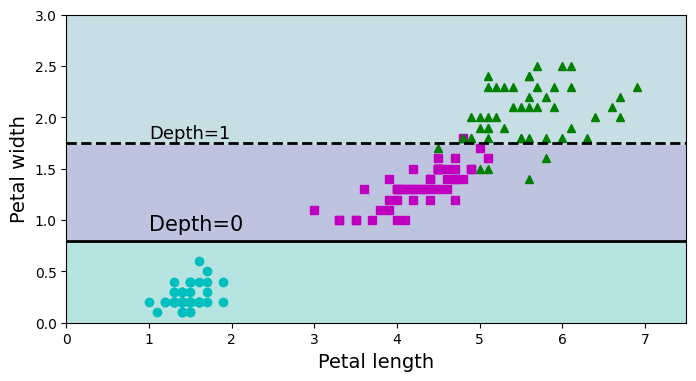

In [10]:
# Set the size of the figure
plt.figure(figsize=(8, 4))

# Plot the decision boundaries of the tweaked Decision Tree classifier
plot_decision_boundary(tree_clf_tweaked, X, y, legend=False)

# Add horizontal lines indicating decision boundaries
plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)  # Decision boundary at y=0.8
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)  # Decision boundary at y=1.75

# Add annotations indicating depth
plt.text(1.0, 0.9, "Depth=0", fontsize=15)
plt.text(1.0, 1.80, "Depth=1", fontsize=13)

# Display the plot

plt.show()


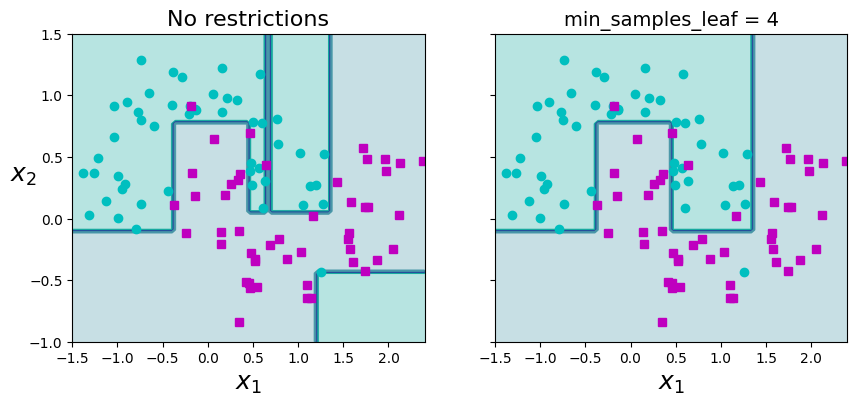

In [11]:
# Import necessary libraries
from sklearn.datasets import make_moons

# Generate moon-shaped synthetic data
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

# Initialize two Decision Tree classifiers with different parameters
deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)

# Fit both classifiers to the synthetic data
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

# Create a figure with two subplots for visualizing decision boundaries
fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

# Plot decision boundaries for the first classifier
plt.sca(axes[0])
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)

# Plot decision boundaries for the second classifier
plt.sca(axes[1])
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)
plt.ylabel("")

# Display the plot

plt.show()


In [ ]:
# Define the rotation angle
angle = np.pi / 180 * 20

# Define the rotation matrix using the angle
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])

# Rotate the moon-shaped dataset using the rotation matrix
Xr = X.dot(rotation_matrix)

# Initialize a Decision Tree classifier
tree_clf_r = DecisionTreeClassifier(random_state=42)

# Fit the classifier to the rotated dataset
tree_clf_r.fit(Xr, y)

# Create a figure to plot the decision boundaries
plt.figure(figsize=(8, 3))

# Plot decision boundaries for the classifier trained on the rotated dataset
plot_decision_boundary(tree_clf_r, Xr, y, axes=[0.5, 7.5, -1.0, 1], iris=False)

# Show the plot
plt.show()
